# Installing necessary packages

In [1]:
!pip install yfinance

In [6]:
!pip install pandas-datareader pandas numpy matplotlib scikit-learn tensorflow

# Loading stock fundemantals for AAPL from last 6 years

In [2]:
import yfinance as yf

data = yf.download("AAPL", start="2019-01-01", end="2025-01-01")
print(data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2019-01-02  37.667183  37.889009  36.787041  36.944466  148158800
2019-01-03  33.915249  34.757226  33.869929  34.342199  365248800
2019-01-04  35.363079  35.432252  34.299279  34.473398  234428400
2019-01-07  35.284351  35.499022  34.800155  35.468013  219111200
2019-01-08  35.956997  36.212216  35.425097  35.673157  164101200


In [3]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300
2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500
2024-12-31,250.144974,253.001833,249.156056,252.162760,39480700


In [4]:
ticker_for_predict=yf.Ticker("AAPL")
dividends=ticker_for_predict.dividends
print(dividends)

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2024-02-09 00:00:00-05:00    0.240000
2024-05-10 00:00:00-04:00    0.250000
2024-08-12 00:00:00-04:00    0.250000
2024-11-08 00:00:00-05:00    0.250000
2025-02-10 00:00:00-05:00    0.250000
Name: Dividends, Length: 86, dtype: float64


In [9]:
import numpy as np
volume_avg=np.average(data['Volume'])
print(f"Average volume in last 6 years was : {volume_avg}")

Average volume in last 6 years was : 94170088.94039735


In [10]:
data.columns = data.columns.get_level_values(0)

# Feature exctration for technical indicators

In [11]:
Exponential_moving_avg_twosix=data['Close'].ewm(span=26, min_periods=1,adjust=False).mean()
print(Exponential_moving_avg_twosix)

Date
2019-01-02     37.667183
2019-01-03     37.389262
2019-01-04     37.239174
2019-01-07     37.094373
2019-01-08     37.010123
                 ...    
2024-12-24    244.117268
2024-12-26    245.200101
2024-12-27    245.948930
2024-12-30    246.391455
2024-12-31    246.669493
Name: Close, Length: 1510, dtype: float64


In [12]:
data['EMA']=Exponential_moving_avg_twosix
print(data.tail())

Price            Close        High         Low        Open    Volume  \
Date                                                                   
2024-12-24  257.916443  257.926411  255.009620  255.209412  23234700   
2024-12-26  258.735504  259.814335  257.347047  257.906429  27237100   
2024-12-27  255.309296  258.415896  252.782075  257.546826  42355300   
2024-12-30  251.923019  253.221595  250.474615  251.952985  35557500   
2024-12-31  250.144974  253.001833  249.156056  252.162760  39480700   

Price              EMA  
Date                    
2024-12-24  244.117268  
2024-12-26  245.200101  
2024-12-27  245.948930  
2024-12-30  246.391455  
2024-12-31  246.669493  


In [13]:
Exponential_moving_avg_onetwo=data['Close'].ewm(span=12, min_periods=1,adjust=False).mean()
macd=Exponential_moving_avg_onetwo-Exponential_moving_avg_twosix
data["MACD"]=macd
print(data)

Price            Close        High         Low        Open     Volume  \
Date                                                                    
2019-01-02   37.667183   37.889009   36.787041   36.944466  148158800   
2019-01-03   33.915249   34.757226   33.869929   34.342199  365248800   
2019-01-04   35.363079   35.432252   34.299279   34.473398  234428400   
2019-01-07   35.284351   35.499022   34.800155   35.468013  219111200   
2019-01-08   35.956997   36.212216   35.425097   35.673157  164101200   
...                ...         ...         ...         ...        ...   
2024-12-24  257.916443  257.926411  255.009620  255.209412   23234700   
2024-12-26  258.735504  259.814335  257.347047  257.906429   27237100   
2024-12-27  255.309296  258.415896  252.782075  257.546826   42355300   
2024-12-30  251.923019  253.221595  250.474615  251.952985   35557500   
2024-12-31  250.144974  253.001833  249.156056  252.162760   39480700   

Price              EMA      MACD  
Date           

In [14]:
Signal_line=data['MACD'].ewm(span=9, min_periods=1,adjust=False).mean()
data["Signal line"]=Signal_line
print(data)

Price            Close        High         Low        Open     Volume  \
Date                                                                    
2019-01-02   37.667183   37.889009   36.787041   36.944466  148158800   
2019-01-03   33.915249   34.757226   33.869929   34.342199  365248800   
2019-01-04   35.363079   35.432252   34.299279   34.473398  234428400   
2019-01-07   35.284351   35.499022   34.800155   35.468013  219111200   
2019-01-08   35.956997   36.212216   35.425097   35.673157  164101200   
...                ...         ...         ...         ...        ...   
2024-12-24  257.916443  257.926411  255.009620  255.209412   23234700   
2024-12-26  258.735504  259.814335  257.347047  257.906429   27237100   
2024-12-27  255.309296  258.415896  252.782075  257.546826   42355300   
2024-12-30  251.923019  253.221595  250.474615  251.952985   35557500   
2024-12-31  250.144974  253.001833  249.156056  252.162760   39480700   

Price              EMA      MACD  Signal line  
Da

In [15]:
obv = [0]
for i in range(1, len(data)):
    if data['Close'].iloc[i] > data['Close'].iloc[i - 1]:
        obv.append(obv[-1] + data['Volume'].iloc[i])
    elif data['Close'].iloc[i] < data['Close'].iloc[i - 1]:
        obv.append(obv[-1] - data['Volume'].iloc[i])
    else:
        obv.append(obv[-1])

In [16]:
data['OBV']=obv
print(data)

Price            Close        High         Low        Open     Volume  \
Date                                                                    
2019-01-02   37.667183   37.889009   36.787041   36.944466  148158800   
2019-01-03   33.915249   34.757226   33.869929   34.342199  365248800   
2019-01-04   35.363079   35.432252   34.299279   34.473398  234428400   
2019-01-07   35.284351   35.499022   34.800155   35.468013  219111200   
2019-01-08   35.956997   36.212216   35.425097   35.673157  164101200   
...                ...         ...         ...         ...        ...   
2024-12-24  257.916443  257.926411  255.009620  255.209412   23234700   
2024-12-26  258.735504  259.814335  257.347047  257.906429   27237100   
2024-12-27  255.309296  258.415896  252.782075  257.546826   42355300   
2024-12-30  251.923019  253.221595  250.474615  251.952985   35557500   
2024-12-31  250.144974  253.001833  249.156056  252.162760   39480700   

Price              EMA      MACD  Signal line     

In [17]:
data

Price,Close,High,Low,Open,Volume,EMA,MACD,Signal line,OBV
Date,,,,,,,,,
2019-01-02,37.667183,37.889009,36.787041,36.944466,148158800,37.667183,0.000000,0.000000,0
2019-01-03,33.915249,34.757226,33.869929,34.342199,365248800,37.389262,-0.299300,-0.059860,-365248800
2019-01-04,35.363079,35.432252,34.299279,34.473398,234428400,37.239174,-0.414886,-0.130865,-130820400
2019-01-07,35.284351,35.499022,34.800155,35.468013,219111200,37.094373,-0.506998,-0.206092,-349931600
2019-01-08,35.956997,36.212216,35.425097,35.673157,164101200,37.010123,-0.519729,-0.268819,-185830400
...,...,...,...,...,...,...,...,...,...
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,244.117268,6.067327,5.390176,6369617800
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,245.200101,6.300019,5.572145,6396854900
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300,245.948930,6.137217,5.685159,6354499600


In [24]:
eps = yf.Ticker("AAPL").info.get('trailingEps')
pe_ratio=yf.Ticker("AAPL").info.get("trailingPE")
dividend_yield=yf.Ticker("AAPL").info.get("trailingAnnualDividendRate")/yf.Ticker("AAPL").info.get("currentPrice")
print(f"Trailing eps is {eps} with p/e ratio of {pe_ratio} and dividend yield of {dividend_yield}")

Trailing eps is 6.44 with p/e ratio of 31.447205 and dividend yield of 0.004888406083349792


In [31]:
data['Return from 1d'] = data['Close'].pct_change().fillna(0)

In [33]:
data = data.drop(['SMA_10', 'Return_1d'], axis=1)

In [34]:
data

Price,Close,High,Low,Open,Volume,EMA,MACD,Signal line,OBV,Return from 1d
Date,,,,,,,,,,
2019-01-02,37.667183,37.889009,36.787041,36.944466,148158800,37.667183,0.000000,0.000000,0,0.000000
2019-01-03,33.915249,34.757226,33.869929,34.342199,365248800,37.389262,-0.299300,-0.059860,-365248800,-0.099608
2019-01-04,35.363079,35.432252,34.299279,34.473398,234428400,37.239174,-0.414886,-0.130865,-130820400,0.042690
2019-01-07,35.284351,35.499022,34.800155,35.468013,219111200,37.094373,-0.506998,-0.206092,-349931600,-0.002226
2019-01-08,35.956997,36.212216,35.425097,35.673157,164101200,37.010123,-0.519729,-0.268819,-185830400,0.019064
...,...,...,...,...,...,...,...,...,...,...
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,244.117268,6.067327,5.390176,6369617800,0.011478
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,245.200101,6.300019,5.572145,6396854900,0.003176
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300,245.948930,6.137217,5.685159,6354499600,-0.013242


Preparing data for closing and opening price prediction

In [36]:
data_close=data.copy()
data_open=data.copy()
data_close["Target"] = (data["Close"].shift(-1))
data_open["Target"] = (data["Open"].shift(-1))
data_close=data_close.dropna()
data_open=data_open.dropna()

In [53]:
print(data_close.columns)

Index(['level_0', 'index', 'Close', 'High', 'Low', 'Open', 'Volume', 'EMA',
       'MACD', 'Signal line', 'OBV', 'Return from 1d', 'Target'],
      dtype='object', name='Price')


In [61]:
# data_open = data_open.reset_index()
# data_open=data_open.drop(['Date'],axis=1)
print(data_close.tail())
print("----------------")
print(data_open.tail())

Price       Close        High         Low        Open    Volume         EMA  \
1504   254.989655  255.369227  253.171646  254.490204  40858800  243.013334   
1505   257.916443  257.926411  255.009620  255.209412  23234700  244.117268   
1506   258.735504  259.814335  257.347047  257.906429  27237100  245.200101   
1507   255.309296  258.415896  252.782075  257.546826  42355300  245.948930   
1508   251.923019  253.221595  250.474615  251.952985  35557500  246.391455   

Price      MACD  Signal line         OBV  Return from 1d      Target  
1504   5.765470     5.220889  6346383100        0.003065  257.916443  
1505   6.067327     5.390176  6369617800        0.011478  258.735504  
1506   6.300019     5.572145  6396854900        0.003176  255.309296  
1507   6.137217     5.685159  6354499600       -0.013242  251.923019  
1508   5.669595     5.682046  6318942100       -0.013263  250.144974  
----------------
Price       Close        High         Low        Open    Volume         EMA  \
150

Visualizing data

In [39]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


In [40]:
import mplfinance as mpf

/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


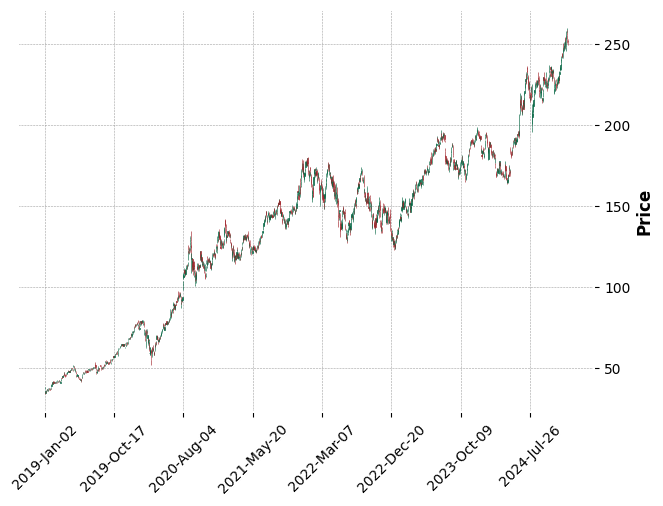

In [43]:
mpf.plot(data, type='candle', style='charles')

<Axes: title={'center': 'MACD vs Signal Line'}, xlabel='Date'>

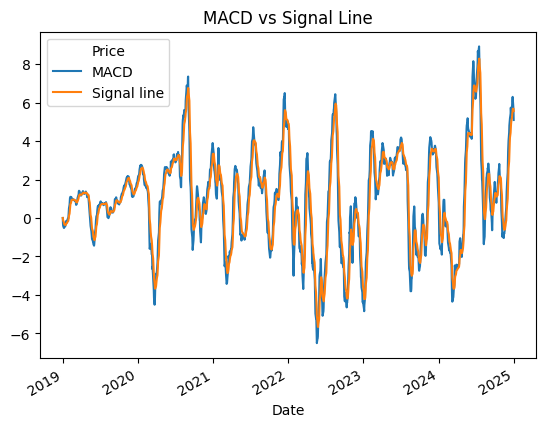

In [42]:
data[['MACD', 'Signal line']].plot(title="MACD vs Signal Line")

Training the model

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [83]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_close)

In [84]:
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:]

In [85]:
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len, 0])
        y.append(data[i+seq_len, 0])
    return np.array(X), np.array(y)
seq_len = 60
X_train, y_train = create_sequences(train_data, seq_len)
X_test, y_test = create_sequences(test_data, seq_len)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
36/36 - 4s - 104ms/step - loss: 0.0203
Epoch 2/50
36/36 - 1s - 22ms/step - loss: 0.0013
Epoch 3/50
36/36 - 1s - 35ms/step - loss: 5.4593e-04
Epoch 4/50
36/36 - 1s - 35ms/step - loss: 4.9075e-04
Epoch 5/50
36/36 - 1s - 22ms/step - loss: 4.7584e-04
Epoch 6/50
36/36 - 1s - 22ms/step - loss: 4.6401e-04
Epoch 7/50
36/36 - 1s - 36ms/step - loss: 4.6194e-04
Epoch 8/50
36/36 - 1s - 35ms/step - loss: 4.4256e-04
Epoch 9/50
36/36 - 1s - 37ms/step - loss: 4.4523e-04
Epoch 10/50
36/36 - 1s - 37ms/step - loss: 4.3011e-04
Epoch 11/50
36/36 - 1s - 34ms/step - loss: 4.3088e-04
Epoch 12/50
36/36 - 1s - 22ms/step - loss: 4.2937e-04
Epoch 13/50
36/36 - 1s - 35ms/step - loss: 4.2182e-04
Epoch 14/50
36/36 - 1s - 22ms/step - loss: 3.9028e-04
Epoch 15/50
36/36 - 1s - 37ms/step - loss: 4.1028e-04
Epoch 16/50
36/36 - 2s - 59ms/step - loss: 4.0875e-04
Epoch 17/50
36/36 - 1s - 21ms/step - loss: 3.8861e-04
Epoch 18/50
36/36 - 1s - 22ms/step - loss: 3.6336e-04
Epoch 19/50
36/36 - 1s - 21ms/step - loss: 3

In [86]:
predictions = model.predict(X_test)

mse = model.evaluate(X_test, y_test)
print(f'MSE: {mse}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.4674e-04
MSE: 0.0006097237346693873


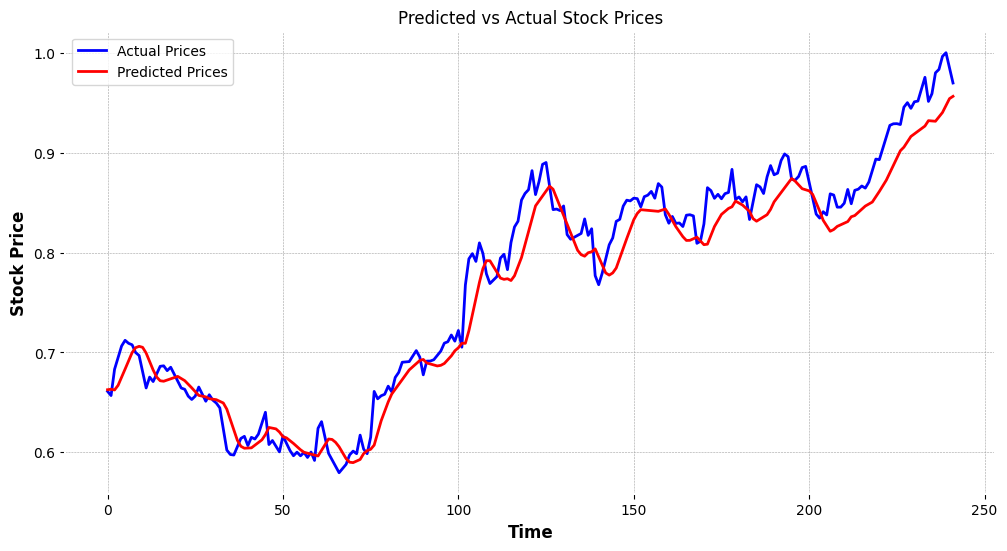

In [88]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.title('Predicted vs Actual Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
